<!--# STAT 207: Data Science Exploration-->
# Linear Regression Modeling

Until now, we have investigated the distributions of single variables and their summary statistics, and the dependence of the distribution of a single variable on a second grouping variable, e.g., two-sample tests and confidence intervals for differences between means or proportions.

Regression analysis is a general approach that  enables study of the dependence of one variable, the response variable, on other variables, called explanatory or exogenous variables. It is crucial that the explanatory variables are things that can be measured along with the target reponse variable. Then we can use the data to build a model for predicting the response from the exogenous variables, and to determine which of the explanatory variables has a significant relationship with the response.

We'll consider:

+ The general modeling framework with response and multiple explanatory variables


+ Least squares criterion - minimizing sum of square residuals


+ Model Coefficient estimates, standard errors and inferences


+ Implementation via the python library statsmodels


+ Residual plots to assess whether the model is adequate


+ Transformation of variables to achieve linearity


+ Encoding categorical explanatory variables in the model




**Primary modeling package: statsmodels**

To install statsmodels from the anaconda command line:

    conda install -c conda-forge statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Bad key "text.kerning_factor" on line 4 in
C:\Users\vme3\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


####################################################################

# Example 1: Mother/Daughter heights

## Research Question 1a: Is there a relationship between mother and daugher heights *in the sample*?
We will discuss four ways to quantify this relationship:

### 1.a.i Visualizations:
* Scatter plots

### 1.a.ii Summary Statistics:
* covariance
* correlation (R)
* R^2

### 1.a.iii Model Fitting
* Fitting a simple linear regression model

####################################################################

In [2]:
df = pd.read_csv('heights.txt', sep=' ')
df.head()

,Mheight,Dheight
0,59.7,55.1
1,58.2,56.5
2,60.6,56.0
3,60.7,56.8
4,61.8,56.0


In [3]:
df.shape

(1375, 2)

In [4]:
df.describe()

,Mheight,Dheight
count,1375.000000,1375.000000
mean,62.452800,63.751055
std,2.355103,2.600053
min,55.400000,55.100000
25%,60.800000,62.000000
50%,62.400000,63.600000
75%,63.900000,65.600000
max,70.800000,73.100000


## 1.a.i Visualizations
If we want to visually examine the distribution of the mother and daughter heights *separately*, we can look at a histogram of each numerical variable.

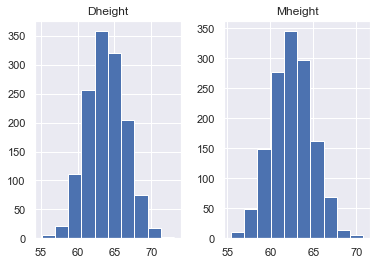

In [5]:
df.hist()
plt.show()

However if we want to visually examine the *relationship* between the two categorical variables we can use a scatterplot.

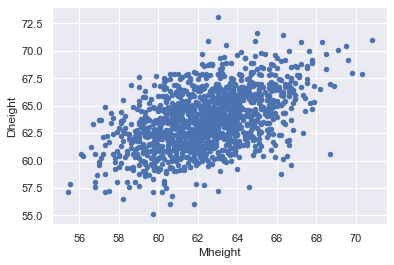

In [6]:
df.plot.scatter(x='Mheight', y='Dheight', c='b')
plt.show()

## Describing the Relationship between two Numerical Variables

#### What can we say about this relationship?

When visualizing the relationship between two numerical varibles there are four things that we should be ready to discuss.
1. **What is the direction of the relationship?**
    - For instance, this relationship is going up and to the right, therefore it is a positive relationship.
2. **What is the shape of the relationship?**
    - For instance, if we were to draw a "best fit" curve running through the points in this plot, it would be linear. Therefore this is a linear relationship.
3. **What is the strength of this relationship?**
    - For instance, the points in this relationship do not perfectly fall on this "best fit" curve that we would have drawn, so it is not a STRONG relationship. However, we do see some pattern to the relationship. So we can say that this is a moderate relationship.
4. **Are there any outliers in the data?**
    - If there are any points that fall far away from the main cloud of data, then we could classify this as an outlier. In this. However, this particular dataset does not seem to have any outliers.

## 1.a.ii Summary Statistics
How do we *numerically* quantify the relationship between these two numerical variables?

#### Covariance between the two numerical variables (in the sample)
If we have a set of numerical variables values ($x_1,x_2,...,x_n$) and another set of numerical variable values ($y_1,y_2,...,y_n$). The **sample covariance** between them is defined as:
$$s_{xy}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{n-1}$$.

#### Correlation (R) between the numerical variables

The value of $s_{xy}$ can be anything, so it has no standard scale. Therefore it makes it difficult to compare relationships between one dataset to the next.

If $s_x$ is the standard deviation of the numerical variable values ($x_1,x_2,...,x_n$) and $s_y$ is the standard deviation of the numerical variable values ($y_1,y_2,...,y_n$), then we can define the correlation between these two numerical variables as:

$$R=\frac{s_{xy}}{s_xs_y}$$


By dividing $s_{xy}$ by $s_xs_y$ we have scaled it such that R is always between -1 and 1. Values close to 1 indicate strong postive linear dependence. Values close to -1 indicate strong negative linear dependence. Correlation = 0 means there is no linear dependence. 

Using pandas, we can compute the correlation as follows, extracting the desired pariwise correlation from the correlation matrix.

In [7]:
df.corr()

,Mheight,Dheight
Mheight,1.000000,0.490709
Dheight,0.490709,1.000000


In [8]:
rxy = df.corr().iloc[0,1]
rxy

0.49070936145753397

#### Describe the linear relationship of mother and daughter heights using R.
<br />
<br />
<br />
<br />
<br />
<br />


#### What R measures?
The correlation coefficient R is used to describe:
* the strength of the *linear* relationship between two numerical variables and 
* the direction of the *linear* relationship between two numerical variables.

#### When to use R?
* Therefore, R should also be used when the relationship between the numerical variables is *linear*.


We can plot a scatterplot along with the "best fit" line of the data using the code below.

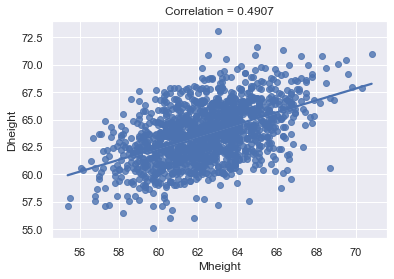

In [9]:
sns.regplot(x='Mheight', y='Dheight', data=df, ci=False)
plt.title('Correlation = '+str(round(rxy, 4)))
plt.show()

## 1.a.iii Model Fitting

Finally, if we have some "suspicion" as to whether one variable causes/affects another variable, we can call the variable that we "suspect" is caused by the other as the **response variable** and we can call a variable that we *suspect* causes/affects the response variable a **explanatory variable.**

Because we suspect that the mother height affects the daughters height we would like to formulate a **simple linear regression model** $\hat{y}=\hat{\beta_0}+\hat{\beta_1}x$ where $x$ is our explanatory variable which is the mother's height and $\hat{y}$ is the predicted value of our response variable $y$ (the daughter's height).


<br />
<br />
<br />
<br />
<br />

### But the questions now are are: 
1. What should our intercept $\hat{\beta_0}$ and slope $\hat{\beta_1}$ of this line be that "best fits" the data shown in our scatter plot?
2. What do we mean when we say a line "best fits" the data?

***

### WE NEED SOME THEORY/DEFINITIONS: General framework for linear models (using random variables).

#### How  can we describe the theory behind a POPULATION linear regression model?

Suppose we have a data frame of $n$ observations on variables $X_1, X_2, \ldots, X_p, Y$. The variable $Y$ is the **response variable** of interest, often called an **endogenous** variable. The variables $X_1, X_2, \ldots, X_p$ are possible **explanatory variables**, also called **exogenenous** variables. It might be helpful to think of the random variables as the variable names and the observed values as the entries in a data frame structure as follows:


| $X_1$ | $X_2$ | $\cdots$ | $X_p$ | $Y$ |
| --- | --- | --- | --- | --- |
| $x_{11}$ | $x_{12}$ | $\cdots$ | $x_{1p}$ | $y_1$ |
| $x_{21}$ | $x_{22}$ | $\cdots$ | $x_{2p}$ | $y_2$ |
| $\vdots$ | $\vdots$ | $\cdots$ | $\vdots$ | $\vdots$ |
| $x_{n1}$ | $x_{n2}$ | $\cdots$ | $x_{np}$ | $y_n$ |

<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />




A basic way to model the dependence of $Y$ on the other variables is a linear model of the form:

$$
E(Y) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p
$$
**What does this mean?**
<br />
<br />
<br />
<br />
<br />
<br />
A common starting assumption is that the standard deviation of $Y$ is constant, say, equal to $\sigma_{resid}$, and that all of the responses $Y_1, Y_2, \ldots, Y_n$ are independent. Then another way to express the model is in the form

$$
Y_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \cdots + \beta_p X_{ip} + e_i, \quad i=1,2,\ldots,n
$$

where the 'noise' terms $e_1, e_2, \ldots, e_n$ are a random sample from a distribution with mean zero and standard deviation $\sigma$.

**Assumption**

<br />
<br />
<br />
<br />
<br />
<br />


**What we might want to approximate (but will never be able to calculate)?**

The regression coefficients $\beta_0, \beta_1, \ldots, \beta_p$ are population parameters that we would like to estimate from the data. The errors or noise terms $e_1, e_2, \ldots, e_n$ are not observable. We estimate their standard deviation from the observed data $x_{i1}, x_{i2}, \ldots, x_{ip}, y_{i}$, $i=1,2,\ldots,n$.


<br />
<br />
<br />
<br />
<br />
<br />


**What we can calculate instead to help us approximate $\beta_0, \beta_1, \ldots, \beta_p$?**

We can create linear regression equation that is models *just* the sample data using 

$$
Y_i = \hat{\beta_0} + \hat{\beta_1} X_{i1} + \hat{\beta_2} X_{i2} + \cdots + \hat{\beta_p} X_{ip}, \quad i=1,2,\ldots,n
$$

<br />
<br />
<br />
<br />
<br />
<br />

### What is an efficient way of calculating these values of $\hat{\beta_0}, \hat{\beta_1},...\hat{\beta_p}$ such that $\hat{y} = \hat{\beta_0} + \hat{\beta_1} x_{1} + \hat{\beta_2} x_{2} + \cdots + \hat{\beta_p} x_{p}$ "best fits" the data?

**Ordinary Least Squares (OLS)**

If the model assumptions are correct, then statistically efficient estimates of the regression coefficients are provide by the method of ordinay least squares (OLS):
***
**Goal**
Find the values of 

$b_0, b_1, \ldots, b_p$. 

that minimize 
$$
SSE(b_0, b_1, \ldots, b_p) = \sum_{i=1}^n (y_{i} - \hat{y}_i)^2,
$$

where $$
\hat{y}_i = b_0 + b_1 x_{i1}  + b_2 x_{i2} + \cdots + b_p x_{ip}, \quad i=1,2,\ldots, n.
$$

<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />


***
**How to find this**
This has an explicit solution using linear algebra. We will derive the formulas for the special case of one explanatory variable (simple linear regression). 

Statistical modeling packages allow us to fit the model easily by specifying which variables to include. These packages routinely provide both estimates and standard errors for the estimates. 

**Definitions:**

* We denote these optimal values of $b_0, b_1, \ldots, b_p$ that minimize $SSE(b_0, b_1, \ldots, b_p) = \sum_{i=1}^n (y_{i} - \hat{y}_i)^2$ as $\hat{\beta}_0, \hat{\beta}_1,...,\hat{\beta}_p$ respectively.

* We call the **SSE** that uses these values of $\hat{\beta}_0, \hat{\beta}_1,...,\hat{\beta}_p$  the "residual sum of square" (also called the "sum square error").



**Fitted values and proportion of variance explained:**

Given the coefficient estimates the fitted values are:

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + \cdots + \hat{\beta}_p x_{ip}, \quad i=1,2,\ldots, n.
$$

These are the best fitting linear combinations of the explanatory variables. They mimimize the sum of squared residuals with respect to the coefficients.

The mimimized **residual sum of squares** have the form

$$
SSE = \sum_{i=1}^n (y_i - \hat{y}_i)^2.
$$

<br />
<br />
<br />
<br />

For the ith observation in the dataset with the explanatory variable values $(x_{i1},x_{2i},...,x_{pi})$ and response variable value $y_{i}$, we call the **residual** of this observations $residual_i=y_i - \hat{y}_i$. This represents how far off our model prediction was from the actual value of $y_i$.



### 1.a.iii. A summary statistic that describes the explanatory power of the regression model: $R^2$
**(Relating this back to the theory: what does RSS *represent?*)**

For comparison, if we ignored all the explanatory variables, the **total variation** in $y$ is

$$
SST = \sum_{i=1}^n (y_i - \bar{y})^2 = (n-1) S_y^2.
$$

Notice the relationship that is going on here? The SST is the numerator of the sample variance of our y-values:

$$S_y^2=\frac{\sum_{i=1}^n (y_i - \bar{y})^2}{n-1}$$.


<br />
<br />
<br />
<br />
<br />
<br />

Relating SST and SSE together we can think of them as the following:
* SST represents
<br />
<br />
<br />
<br />
* SSE represents
<br />
<br />
<br />
<br />
* SST-SSE represents
<br />
<br />
<br />
<br />


Thus we can define a new metric called, **R^2** defined as

$$
R^2 = {SST - SSE \over SST} = 1 - {SSE \over SST}.
$$

which represents the **proportion of variance of the respones variable explained by the model.**,


Regression packages often report this statistic as R-square.

#### Fitting a regression model and summarizing it

We import the formula api from the statsmodels library and then fit a simple linear regression model.

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

This step fits the model and creates an object containing the results.

In [11]:
results = smf.ols('Dheight ~ Mheight', data=df).fit()

Using the .summary() function, we can display an organized summary of the fitted model. The summary includes various quantitiative features of the model fit as well as a summary table for the model coefficient estimates, standard errors and coefficient t tests.

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Dheight   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     435.5
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           3.22e-84
Time:                        00:26:58   Log-Likelihood:                -3075.0
No. Observations:                1375   AIC:                             6154.
Df Residuals:                    1373   BIC:                             6164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9174      1.622     18.439      0.000      26.735      33.100
Mheight        0.5417      0.026     20.868      0.000       0.491       0.593
==============================================================================
Omnibus:                        1.412   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.353
Skew:                           0.002   Prob(JB):                        0.508
Kurtosis:                       3.154   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Extracting individual pieces information from the results

If we want individual tables from the results summary we can access them as follows:

In [13]:
results.summary().tables[0]

Dep. Variable:,Dheight,R-squared:,0.241
Model:,OLS,Adj. R-squared:,0.240
Method:,Least Squares,F-statistic:,435.5
Date:,"Tue, 13 Oct 2020",Prob (F-statistic):,3.22e-84
Time:,00:26:58,Log-Likelihood:,-3075.0
No. Observations:,1375,AIC:,6154.
Df Residuals:,1373,BIC:,6164.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [14]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,29.9174,1.622,18.439,0.000,26.735,33.100
Mheight,0.5417,0.026,20.868,0.000,0.491,0.593


Uncommenting the following command gives a listing of all the the individual pieces of information we could extract from the ols results object:

In [15]:
# dir(results)

As an example, we can extract the value for $R^2$, the proportion of variance explained, as follows.

In [16]:
results.rsquared

0.24079567742206165

### What can we say about the relationship between mother and daughter heights *in the sample* so far?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

## Research Question 1b: Is there a relationship/association between mother and daugher heights *in the population*?
We will discuss two ways to conduct inference about the nature of a linear relationship between a numerical response variable and a selected explanatory variable *predictor*.


### 1.b.i Create Confidence Intervals for $\beta_i$:

### 1.b.ii Conduct Hypothesis Testing for $\beta_i$:
$H_0: \beta_i=0$

$H_A: \beta_i\neq0$.


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


### 1b.i Confidence intervals for $\beta_i$
Like with other population parameters that we'ved looked at (ie. $\mu,p,\mu_1-\mu_2,p_1-p_2$), we can create a confidence interval for our population parameter $\beta_i$ using our sample statistic $\hat{\beta_i}$.

**Conditions**
If our conditions for linear regression inference are met (see below) then we can accurately create a confidence interval for $\beta_i$ with the following equation.


**Equation**
$100(1-\alpha)\%$ confidence intervals for the coefficients $\beta_j$ have the form:

$$
(\hat{\beta}_j - t_q \cdot SD(\hat{\beta}_j), \quad \hat{\beta}_j + t_q \cdot SD(\hat{\beta}_j))
$$

where $t_q$ can be computed as 

        t.ppf(1-alpha/2, df=n-p-1)

### We can use the .summary() function to tell us information about the sample slopes $\hat{\beta_i}$ for  $i=1,2,...,p$, the sample intercept  $\hat{\beta_0}$, and other information that helps us build a confidence interval for each of them.

In [17]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,29.9174,1.622,18.439,0.000,26.735,33.100
Mheight,0.5417,0.026,20.868,0.000,0.491,0.593



#### a.) What is the sample slope $\hat{\beta_1}$ for the "Mheight" explanatory variable?

<br/>
<br/>
<br/>
<br/>
<br/>

#### b.) What is the standard error $SD(\hat{\beta_1})$ for the slopes of the "Mheight" explanatory variable?

<br/>
<br/>
<br/>
<br/>
<br/>

#### C.) What is the critical value for a 95% confidence interval for one of these population slopes (or the population intercept)?

<br/>

In [18]:
len(df)

1375

In [19]:
from scipy.stats import t
#t.ppf(1-alpha/2, df=n-p-1)
#n=number of observations
#p=number of slopes in the regression equation (1 slope in this case... the one for MHeight)
t.ppf(1-.05/2, df=1375-1-1)

1.9616932841053176

#### d.) Create a 95% confidence interval for $\beta_1$, the POPULATION SLOPE of of the "Mheight" explanatory variable?

<br/>
<br/>
<br/>
<br/>
<br/>

#### e.) Interpret this confidence interval.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### 1.b.ii Conduct Hypothesis Testing for $\beta_i$:
We can test if there exists a linear relationship between the response variable $Y$ and the explanatory variable $X_i$ (in the population) by determining whether there exists sufficient evidence to suggest that $\beta_i$ is non-zero in the multiple linear regression equation $E(Y) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p$. We do this by setting up the null and alternative hypothesis as such.

$H_0: \beta_i=0$

$H_A: \beta_i\neq0$.

If the conditions for multiple linear regression inference are met (see below), then we can form a conclusion about these hypotheses using the p-value or test-statistic given below.

Like with other population parameters that we'ved looked at (ie. $\mu,p,\mu_1-\mu_2,p_1-p_2$), we can create a test statistic for the sample statistic $\hat{\beta_i}$ as well using the equation 

$$test-stat=\frac{\hat{\theta_0}-\theta_0}{SD[\hat{\theta}]}$$
So we get a test statistic of:
$$t_{n-p-1,j}=\frac{\hat{\beta_i}-0}{SD[\hat{\beta_i}]} \quad j=0, 1, \ldots, p$$


Using this test statistic we can also find the p-value for these hypotheses as such:

$$
\mbox{p-value}_j = P(\vert T \vert \gt \vert t_{n-p-1,j} \vert) = 2 \cdot P(T \lt -\vert t_{n-p-1,j} \vert) 
$$

where $T \sim t_{n-p-1})$.



### We can use the .summary() function to tell us information about the sample slopes $\hat{\beta_i}$ for  $i=1,2,...,p$, the sample intercept  $\hat{\beta_0}$, and other information that helps us conduct a hypothesis test for each of them.

In [20]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,29.9174,1.622,18.439,0.000,26.735,33.100
Mheight,0.5417,0.026,20.868,0.000,0.491,0.593


#### a.) Set up a hypothesis test which will test the claim that there is a linear relationship between between mother and daughter heights in the population.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### b.) Locate the test-statistic for this hypothesis test by looking in the table.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### c.) Calculate the test-statistic for this hypothesis test by hand (looking up the test-statistic information you need in the table).

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### d.) Locate the p-value for this hypothesis test in the table.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### e.) Calculate the p-value for this hypothesis test "by hand" by looking the p-value equation elements that you need in the table.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>



In [21]:
from scipy.stats import t
#2*t.cdf(-|test-statistic|, df=n-p-1)
#n=number of observations
#p=number of slopes in the regression equation (1 slope in this case... the one for MHeight)
2*t.cdf(-20.868, df=1375-1-1)

3.2155597126014536e-84

#### f.) Make a conclusion about these hypotheses using your 95% confidence interval from before.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### g.) Make a conclusion about these hypotheses using test statistic.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### h.) Make a conclusion about these hypotheses using test statistic.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Multiple Linear Regression Assumptions (Theory)
The key assumptions in order for the standard errors to be correct are:

+ The model is unbiased, i.e. the noise terms have mean zero

+ The noise terms are uncorrelated and have equal standard deviations

If the first assumption is violated it means that there are important variables or transformations missing from the model.

If the second assumption is violated a generalized least squares approach might be necessary, or a more general variance formula may be used that does not require a correctly specified covariance structure, at the cost of addition computational and modeling complexity.

#### See below for how to check each of these conditions in an applied setting with diagnostic plots.

### THEORY THAT WORKS FOR JUST SIMPLE LINEAR REGRESSION
#### How do we calculate $\hat{\beta}_1$ for a simple linear regression model (ie. $\hat{y}=\hat{\beta}_0+\hat{\beta}_1 X_1$).


A **simple linear regression model** is one with just one explanatory variable and has the form

$$
Y_i = \beta_0 + \beta_1 X_i + e_i, \quad i=1, 2,\ldots, n
$$

where unbiasedness of the model implies $E(e_i)=0$. 

For this **single predictor model** the OLS regression coefficient estimates have simple formulas:

$$
\text{Slope: } \hat{\beta}_1 = {\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y}) 
\over \sum_{i=1}^n (X_i - \bar{X})^2 }
= R {S_y \over S_x} \qquad
\text{Intercept: } \hat{\beta}_0 = \bar{Y} - \hat{\beta_1} \bar{X}
$$

where $R$ is the sample correlation coefficient between $X$ and $Y$, and $S_x$ and $S_y$ are the sample standard deviations of the $X$ and $Y$ data respectively.


#### Using the information below, calculate the sample slope of the MHeight variable by hand. 
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [22]:
df.head()

,Mheight,Dheight
0,59.7,55.1
1,58.2,56.5
2,60.6,56.0
3,60.7,56.8
4,61.8,56.0


In [23]:
df['Mheight'].std()

2.355103276089619

In [24]:
df['Dheight'].std()

2.6000526210817

In [25]:
df.corr()

,Mheight,Dheight
Mheight,1.000000,0.490709
Dheight,0.490709,1.000000


In [26]:
#beta_1_hat=R*(s_y/s_x)
beta_1_hat=.4907*(2.600/2.355)
beta_1_hat

0.5417494692144373

#### Verify this with what you see in the table.

In [27]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,29.9174,1.622,18.439,0.000,26.735,33.100
Mheight,0.5417,0.026,20.868,0.000,0.491,0.593


### THEORY THAT WORKS FOR JUST SIMPLE LINEAR REGRESSION
#### What is the relationship between $R^2=\frac{SST-SSE}{SST}=1-\frac{SSE}{SST}$ defined above and R?

*Just for a simple linear regression model* it turns out that $(R)^2 = R^2 =\frac{SST-SSE}{SST}=1-\frac{SSE}{SST}$, so the squared sample correlation is the proportion of variance explained by the model.

#### Calculate the R^2 by hand, using R.
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [28]:
df.corr()

,Mheight,Dheight
Mheight,1.000000,0.490709
Dheight,0.490709,1.000000


In [29]:
#THIS ONLY WORKS FOR SIMPLE LINEAR REGRESSION (AKA ONE EXPLANATORY VARIABLE)!!!
#R_squared=R**2
R_squared=.4907**2
R_squared

0.24078649000000002

#### Verify this with your regression output from the .summary() function.

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Dheight   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     435.5
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           3.22e-84
Time:                        00:26:59   Log-Likelihood:                -3075.0
No. Observations:                1375   AIC:                             6154.
Df Residuals:                    1373   BIC:                             6164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9174      1.622     18.439      0.000      26.735      33.100
Mheight        0.5417      0.026     20.868      0.000       0.491       0.593
==============================================================================
Omnibus:                        1.412   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.353
Skew:                           0.002   Prob(JB):                        0.508
Kurtosis:                       3.154   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Research Question 1c: How can we predict the daughter's height given the height of a mother?

### We can make predictions using our fitted multiple linear regression equations using the following methods.

Given mother's height the model provides a prediction for her daughter's height. One way to compute this to extract the coefficient estimates and use them to compute the new prediction. The can be accessed directly from the results object as **params**.

#### ONE WAY: Make the prediction by hand.

In [31]:
results.params # estimated regression coefficients

Intercept    29.917437
Mheight       0.541747
dtype: float64

What is the daughter's predicted height if her mother's height is 68 inches? Looking at the output we would compute:
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
$$
\hat{y}_{new} = 29.9174 + 0.5417 * 68 = 66.75
$$

In [32]:
# manual calculation:
29.9174 + 0.5417*68

66.753

In [33]:
# calculation by extracting parameter estimates:
sum(results.params * [1, 68])

66.75623356729778

#### ANOTHER WAY: Making the prediction automatically in Python.

Statmodels has a method for performing this prediction and enhancing it with additionla information. Here it is in action. The argument "exog=" requires a dictionary list of the exogenous (explanatory) variables and their values.

In [34]:
results.predict(exog=dict(Mheight=68))

0    66.756234
dtype: float64

#### Verify the results that you got using both ways are the same.

Using this method we can easily predict multiple values at a time:

In [35]:
results.predict(exog=dict(Mheight=[60, 68, 70]))

0    62.422257
1    66.756234
2    67.839728
dtype: float64

## Research Question 1d: How can we test our model assumptions for inference as well as the fit of the model?

### Multiple Linear Regression Condition 1: (LINEARITY CONDITION)
#### Is a linear model a good fit for the data?
In order for multiple linear regression model to be a good fit of the data as well as for accurate inferences to be made (using the methods we discussed above), the first condition that must be satisfied is that there must be a linear relationship between the explanatory variables and the response variable.

#### Idea:
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### How to check condition 1 by plotting residuals versus fitted values.

In the analysis of the heights data, the directory of component methods for the OLS results includes 'resid' and 'fittedvalues' among many others. For any regression model, 'fittedvalues' is the array of closest fitting values for the $n$ responses, subject to the constraints imposed by the model. The $i$th fitted value is

$$
\mbox{Fitted values:}\qquad \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \cdots + \hat{\beta}_p x_{ip}, \quad i=1, 2, \ldots, n
$$
<br/>
<br/>
<br/>
<br/>
<br/>
The deviations of the observations of the opbservations from their fitted values can provide information about model fit. We can check this using the residuals available in 'resid'. The $i$th residual is given by

$$
\mbox{Residuals:}\qquad \hat{e}_i = y_i - \hat{y}_i, \quad i = 1, 2, \ldots, n.
$$
<br/>
<br/>
<br/>
<br/>
<br/>
**Fact:** if the model includes an intercept, then the mean (and sum) of the residuals is always 0, and the residuals and fitted values are uncorrelated (no linear association).

#### Interpreting:
* The linearity condition is met if all points are roughly evenly distributed above and below the x-axis in the fitted values vs. residuals plot (for all ranges along the x-axis.)


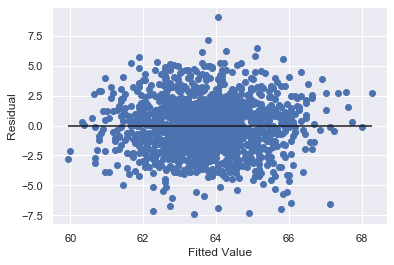

In [36]:
plt.scatter(results.fittedvalues, results.resid)
plt.hlines(y=0, xmin=np.min(results.fittedvalues), xmax=np.max(results.fittedvalues))
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**Result for our data:** The points are roughly evenly distributed above and below the x-axis in the fitted values vs. residuals plot (for all ranges along the x-axis). Thus the linearity condition is met.

#### What would a fitted values vs. residuals plot look like for which the linearity condition is not met?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Multiple Linear Regression Condition 2: (CONSTANT VARIANCE OF RESIDUALS CONDITION)
#### For inference
In order for our multiple linear regression model to make accurate inferences (using the methods we discussed above), the next condition that must be satisfied is that the variance of the residuals must remain constant (for all fitted values.

To check this condition, we can use the same plot as the one used for checking the linearity condition.

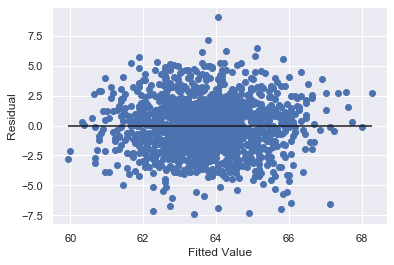

In [37]:
plt.scatter(results.fittedvalues, results.resid)
plt.hlines(y=0, xmin=np.min(results.fittedvalues), xmax=np.max(results.fittedvalues))
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

#### How to check condition 2 by plotting residuals versus fitted values.

Plot the fitted values vs. residuals plot.

#### Interpreting:
* The constant variance of the residuals condition is met if the y-axis ranges of the points remains constant as you move from right to left in fitted values vs. residuals plot.


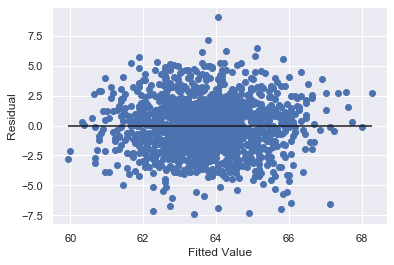

In [38]:
plt.scatter(results.fittedvalues, results.resid)
plt.hlines(y=0, xmin=np.min(results.fittedvalues), xmax=np.max(results.fittedvalues))
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**Result for our data:** For the most part (except for on the edges) the y-axis ranges of the points in our fitted value vs. residuals plots stays around 10 (ie around [-5,5]). So the consant variance of residuals condition is mostly met.

#### What would a fitted values vs. residuals plot look like for which the constant variance of residuals condition is not met?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Multiple Linear Regression Condition 3: (Condition where residuals are normal and have a mean of zero.)
#### For inference
In order for our multiple linear regression model to make accurate inferences (using the methods we discussed above), the next condition that must be satisfied is that the residuals must be normally distributed and must have a mean of zero.

To check this condition, we can look at a histogram of the residuals.

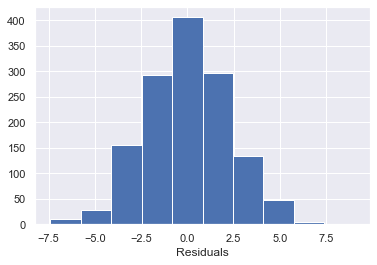

In [39]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

#### How to check condition 3 by plotting the histogram of the residuals.

Plot the histogram of the residuals.

#### Interpreting:
* We can assume that this condition is met if the shape of the histogram is roughly symmetric and unimodal and is centered at 0.


**Result for our data:** Our histogram of residuals is roughly symmetric, unimodal, and centered at 0. Therefore the condition in which the residuals are normally distributed with a mean of 0 is met.

#### What would a histogram of residuals look like if this condition was not met?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Example 2: Animal Species Brain/Body Weights

## Research Question 2: So what are some things we can do if not all of our multiple linear regression are met?

Don't give up just yet!


### Extending the applicability of the linear model with transformations
For certain model violations there is a technique we can *try* where we 
    * transform some of our variables in the dataframe, 
    * recheck the regression conditions again, and
    * proceed with inference and modeling with this transformed dataset if they are met.

#### Example: Interspecies study of brain weight / body weight

In [40]:
brain = pd.read_csv('brain.csv') 
brain.head(10)

,species,bodykg,braing
0,African elephant,6654.000,5712.0
1,African giant pouched rat,1.000,6.6
2,Arctic Fox,3.385,44.5
3,Arctic ground squirrel,0.920,5.7
4,Asian elephant,2547.000,4603.0
5,Baboon,10.550,179.5
6,Big brown bat,0.023,0.3
7,Brazilian tapir,160.000,169.0
8,Cat,3.300,25.6
9,Chimpanzee,52.160,440.0


In [41]:
brain.describe()

,bodykg,braing
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


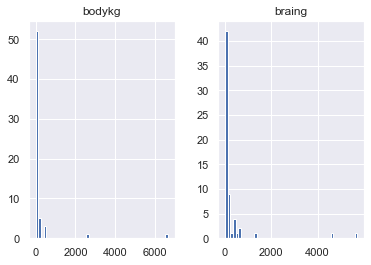

In [42]:
brain.hist(bins=50)
plt.show()

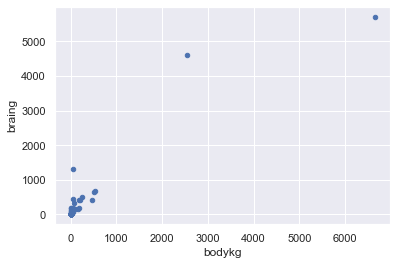

In [43]:
brain.plot.scatter(x='bodykg', y='braing', c='b')
plt.show()

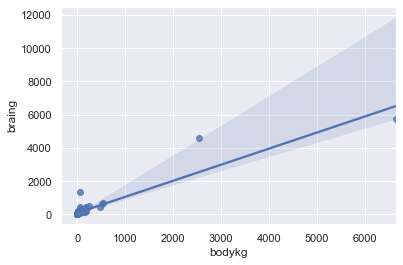

In [44]:
sns.regplot(x='bodykg', y='braing', data=brain)
plt.show()

Fitting a linear model to the raw brain and body mass data is problematic because the regression line is determined by just a few observations and is not representative of all the data. 

#### Residual plot

Here is the residual versus fitted value plot for the OLS regression fit using Seaborn's regplot.

### Let's first check condition 1 (ie. linearity condition) and condition 2 (ie. constant variance of residuals condition) with the fitted values vs. residuals plot with *our original dataframe*.

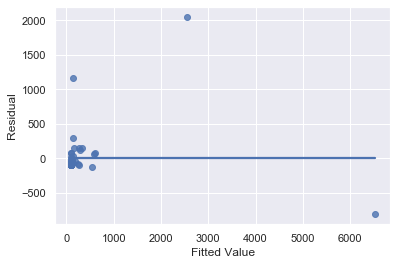

In [45]:
brain_result0 = smf.ols('braing ~ bodykg', data=brain).fit()
sns.regplot(x=brain_result0.fittedvalues, y=brain_result0.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

#### Are the linearity condition (condition 1) and constant variance of residuals condition (condition 2) met?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


### What can we do then?

**Log transformation to address extreme skewness**

Let's try logarithmic transformations of the data to address the extreme skewness and orders of magnitude range in values.

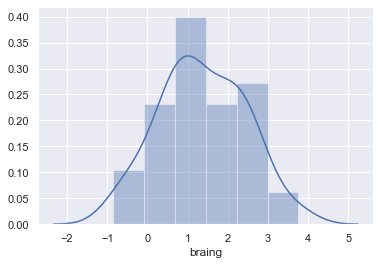

In [46]:
sns.distplot(np.log10(brain['braing']))
plt.show()

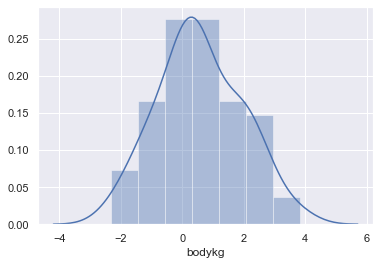

In [47]:
sns.distplot(np.log10(brain['bodykg']))
plt.show()

Looks promising. We add the log transformed variables to the data for further analysis.

In [48]:
brain['log10bodykg'] = np.log10(brain['bodykg'])
brain['log10braing'] = np.log10(brain['braing'])
brain.head(10)

,species,bodykg,braing,log10bodykg,log10braing
0,African elephant,6654.000,5712.0,3.823083,3.756788
1,African giant pouched rat,1.000,6.6,0.000000,0.819544
2,Arctic Fox,3.385,44.5,0.529559,1.648360
3,Arctic ground squirrel,0.920,5.7,-0.036212,0.755875
4,Asian elephant,2547.000,4603.0,3.406029,3.663041
5,Baboon,10.550,179.5,1.023252,2.254064
6,Big brown bat,0.023,0.3,-1.638272,-0.522879
7,Brazilian tapir,160.000,169.0,2.204120,2.227887
8,Cat,3.300,25.6,0.518514,1.408240
9,Chimpanzee,52.160,440.0,1.717338,2.643453


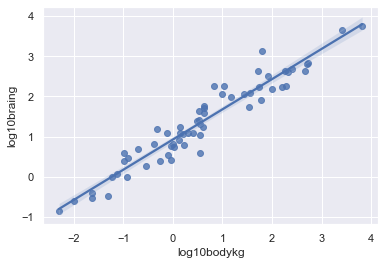

In [49]:
sns.regplot(x='log10bodykg', y='log10braing', data=brain)
plt.show()

### Now let's recheck condition 1 (ie. linearity condition) and condition 2 (ie. constant variance of residuals condition) with the fitted values vs. residuals plot with *our log-transformed variables*.

On the log-log scale the interspecies data appear much more amenable to linear modeling. The least squares line is comparably close to all of the data, not just a few observations, so the line is much more representative of the interspecies relationship between brain and body mass.

#### Residual plot

Let's fit the model and check the residual plot.

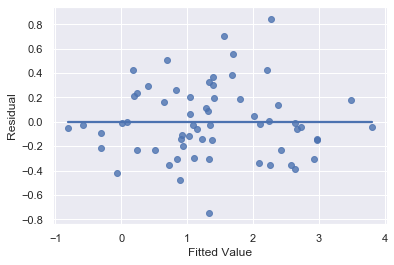

In [50]:
brain_results = smf.ols('log10braing ~ log10bodykg', data=brain).fit()
sns.regplot(x=brain_results.fittedvalues, y=brain_results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

#### Are the linearity condition (condition 1) and constant variance of residuals condition (condition 2) met *for this log-transformed data?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


#### Summary for log-log model

Here is the OLS fitted model summary for further interpretation:

In [51]:
brain_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log10braing   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     697.4
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           9.84e-35
Time:                        00:27:02   Log-Likelihood:                -12.626
No. Observations:                  62   AIC:                             29.25
Df Residuals:                      60   BIC:                             33.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9271      0.042     22.227      0.000       0.844       1.011
log10bodykg     0.7517      0.028     26.409      0.000       0.695       0.809
==============================================================================
Omnibus:                        2.698   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.933
Skew:                           0.405   Prob(JB):                        0.380
Kurtosis:                       3.301   Cond. No.                         1.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## We need to be careful about how we interpret and make predictions of our linear regression models if we have transformed some of the variables.

#### a. Write out the new linear regression equation (which was created using the log-transformed variables).
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### b. Predict the brain mass of an animal that has a body mass of 500 kg (by hand.)
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### Predicting the brain mass based on body mass

Suppose we want to predict the brain mass for a species whose average body mass is 500 kg. How can we use this log-log model to make the prediction?

First, we convert body mass to log scale:

In [52]:
bodymass = 500
xnew = np.log10(bodymass)
xnew

2.6989700043360187

Next, use the fitted model for prediction.

In [53]:
ypred = brain_results.predict(exog=dict(log10bodykg=xnew))[0]
ypred

2.955904736946554

Finally, convert the log10 brain mass back to the original scale.

In [54]:
print('body mass (kg): '+str(bodymass))
print('predicted brain mass (g): '+str(10**ypred))

body mass (kg): 500
predicted brain mass (g): 903.451278785396


# Example 3: Occupational prestige data
In the past two examples we have done the following for just simple linear regression models (ie. one explanatory variable):
* Formulated the regression equation using the Python code output.
* Conducted inference on the population slopes and coefficients
* Checked model conditions
* Learned some data transformation tricks to try when some of the model conditions aren't met.
* Made predictions with our linear regression equation.

## Research Question 3: Is there anything that we need to do differently if there are more than one slope in the linear regression equation (aka if it is a *multiple* linear regression)?
There are a couple things. We will discuss the following.
* Interpretations of the slopes are slightly different
* There's an additional condition you need to check.


### Example: Duncan's occupational prestige data

#### Data exploration and visualization

Data on prestige and other features of 45 occupations in the U.S. in 1950. This is available from the statmodels package.

In [55]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data
prestige.head(10)

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90
minister,prof,21,84,87
professor,prof,64,93,93
dentist,prof,80,100,90
reporter,wc,67,87,52
engineer,prof,72,86,88


In [56]:
prestige.describe()

,income,education,prestige
count,45.000000,45.000000,45.000000
mean,41.866667,52.555556,47.688889
std,24.435072,29.760831,31.510332
min,7.000000,7.000000,3.000000
25%,21.000000,26.000000,16.000000
50%,42.000000,45.000000,41.000000
75%,64.000000,84.000000,81.000000
max,81.000000,100.000000,97.000000


### Multiple linear regression: more than one exogenous variable

Next we consider fitting a model with multiple exogenous variables:

$$
Y_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \cdots + \beta_p X_{ip} + e_i, \quad i=1, 2, \ldots, n.
$$

The model is unbiased, and OLS is optimal if the errors $e_i$ have mean zero, are uncorreated, and have constant standard deviation $\sigma$ (unknown value).


With multiple explanatory variables in the model, the simple linear regression formulas no longer apply. The coefficient estimates can be easily expressed using matrix algebra, but for our purposes it suffices to observe that the
coefficient estimates
$\hat{\beta}_0$, $\hat{\beta}_1$, $\ldots$, $\hat{\beta}_p$ 
are defined by the **least squares equations**:

\begin{align*}
&\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_{i1} + \hat{\beta}_2 X_{i2} + \cdots + \hat{\beta}_p X_{ip}\\
&\sum_{i=1}^n (Y_i - \hat{Y}_i) = 0\\
&\sum_{i=1}^n (Y_i - \hat{Y}_i) X_{i1} = 0\\
&\sum_{i=1}^n (Y_i - \hat{Y}_i) X_{i2} = 0\\
& \qquad \vdots\\
&\sum_{i=1}^n (Y_i - \hat{Y}_i) X_{ip} = 0\\
\end{align*}

Solving a system of equations like this is straightforward using matrix operations. This is a topic covered in courses on linear algebra. Here we note that the numerical solution is built into standard regression functions such as the statsmodels .ols function. We'll see this in action below.

#### Consequences for properties of the residuals

From the least squares equations we can see that the residuals sum to zero (have mean zero), and they are uncorrelated with each of the predictor varirables. It also follows that the residuals are uncorrelated with each of the $X$ variables, and also uncorrelated with the predictor values, i.e. $\hat{e}_i = Y_i - \hat{Y}_i$ and $\hat{Y}_i$ have sample correlation coeffiicent equal to zero.

#### Fitting a multiple linear model, checking it and summarizing it

In [57]:
prestige_res = smf.ols('prestige ~ education + income', data=prestige).fit()

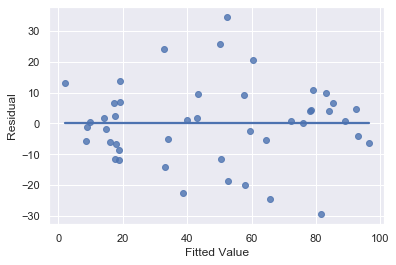

In [58]:
# Check the residual plot
sns.regplot(x=prestige_res.fittedvalues, y=prestige_res.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

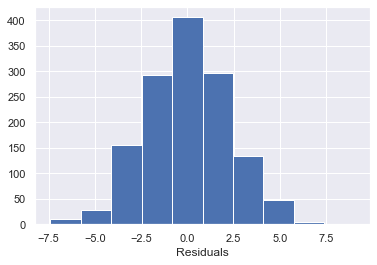

In [59]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

## Condition 4: The explanatory variables must not be collinear.
### (This just applies to multiple linear regression equations).
* Two *explanatory variables* are said to be **collinear** if they have a strong linear relationship between them.
* In order for our model coefficients to not be biased, our explanatory variables should not be collinear.
* If you see that you have a pair of explanatory variables that are collinear, you should delete one of the two from the model.

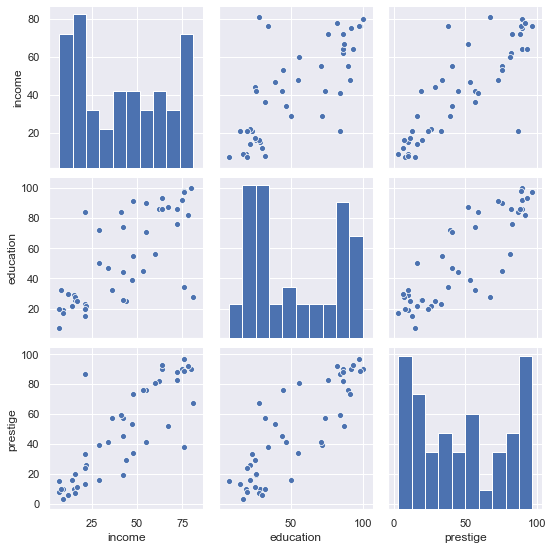

In [60]:
sns.pairplot(prestige)
plt.show()

In [61]:
prestige.corr()

,income,education,prestige
income,1.000000,0.724512,0.837801
education,0.724512,1.000000,0.851916
prestige,0.837801,0.851916,1.000000


#### Do we have any collinear explanatory variables in our dataset?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [62]:
# display the model summary
prestige_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           8.65e-17
Time:                        00:27:05   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.163     -14.686       2.556
education      0.5458      0.098      5.555      0.000       0.348       0.744
income         0.5987      0.120      5.003      0.000       0.357       0.840
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
print(prestige_res.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           8.65e-17
Time:                        00:27:05   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

#### Model interpretation
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

According to the model we see that both education and income have statistically significent positive associations with the prestige score. Caution is required in interpreting these results, as we cannot conclude based on this study that higher income and education level "caused" higher prestige. 

#### Model predictions

Let's estimate the prestige score for a profession with education score = 25 and income = 30. Based on the fitted model we would calculate:
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
$$
\hat{y}_{new} = -6.0647 + 0.5458 * 25 + 0.5987 * 30 = 25.5413
$$

In [64]:
# calculation:
-6.0647 + 0.5458 * 25 + 0.5987 * 30

25.5413

In [65]:
# calculation using predict function:
prestige_res.predict(exog=dict(education=25, income=30))

0    25.543169
dtype: float64

## Warning about making certain types of predictions
These types of predictions are most reliable when the exogenous variables are within the range of the range of the original study. Trying to predict based on extreme values of the exogenous variables is called **extrapolation**. Extrapolation is risky because we have no emprical evidence that the model holds outside of the range of the data in the original study.

# Example 4: Lead exposure data (again)
In the past three examples we have formulated multiple linear regression equations when:
* the response varible is numerical and
* all of the explanatory variables were numerical.

A multiple linear regression model *requires* that the response variable be numerical. BUT we can model an explanatory variable that is categorical by creating a series of 0/1 "indicator variables" for each categorical explanatory variable to represent them in our multiple linear regression equation.


## Creating Categorical Explanatory Variables in a Multiple Linear Regression

**Example: lead exposure data**

In [66]:
lead = pd.read_csv('lead.csv')
lead.head()

,id,age,sex,status,verbiq,perfiq,fulliq,iqtype,totyrs,hyperact,tapping,group
0,101,11.083333,M,77,61,85,70,WISC,11,NaN,72.0,lead < 40
1,102,9.416667,M,77,82,90,85,WISC,6,0.0,61.0,lead < 40
2,103,11.083333,M,30,70,107,86,WISC,5,NaN,49.0,lead < 40
3,104,6.916667,M,77,72,85,76,WISC,5,2.0,48.0,lead < 40
4,105,11.250000,M,62,72,100,84,WISC,11,NaN,51.0,lead < 40


Let's try regressing 'fulliq' on 'age' and 'group'. What will happen given that 'group' is 'lead < 40' or 'lead >= 40'?

In [67]:
lead_res = smf.ols('fulliq ~ age + group', data=lead).fit()
lead_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 fulliq   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.667
Date:                Tue, 13 Oct 2020   Prob (F-statistic):              0.193
Time:                        00:27:05   Log-Likelihood:                -504.53
No. Observations:                 124   AIC:                             1015.
Df Residuals:                     121   BIC:                             1024.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              92.9088      3.806     24.411      0.000      85.374     100.444
group[T.lead >= 40]    -4.8656      2.692     -1.808      0.073     -10.195       0.464
age                    -0.0026      0.369     -0.007      0.994      -0.733       0.728
==============================================================================
Omnibus:                        5.676   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                8.599
Skew:                           0.075   Prob(JB):                       0.0136
Kurtosis:                       4.281   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### What did our model tell us?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

Clearly, the model explains very little, as $R^2$ is close to zero. However, computationally, it illustrates how categorical variables are handled. 

We see that a variable 'group[T.lead >= 40]' was created. What is this? This illustrates a technique for coding categorical variables. The software has defined:

$$
\mbox{group[T.lead >= 40]} = \cases{1,& if 'group'='lead >= 40'\\ 0,& if 'group'='lead < 40'\\}
$$

Notice how this affects the model. The estimated regression model for 'lead < 40' is:

$$
\mbox{fulliq} = 92.91 - 0.0026 * \mbox{age}
$$

For 'lead >= 40', the model becomes

$$
\mbox{fulliq} = 92.91 -4.8656 - 0.0026 * \mbox{age} = 88.044 - 0.0026 * \mbox{age}
$$

Thus there is a parallel shift in the fitted regression line, with a separate intercept for each group.

Note, that the 'group' coefficient is statistically significant, with a p-value of 0.073 (if you use $\alpha=0.10). By fitting this two variable regression model we were able to do an age-adjusted test of this effect and found evidence of a lead-level group effect. 

This encoding of categorical variables can be done explicitly by the user, but it is important to understand what is happening behind the scenes when we leave it to the software to automate the encoding.

In this example, we needed only one 0/1 variable (and thus one slope) to distiguish 'lead >= 40' group and 'lead < 40' group. The 'lead < 40' group was are the reference category (indicator = 0), so the intercept refers to them.

In general, if we have $k$ categories for some variable, then we will need $k-1$ different 0/1 indicator variables to encode it. One cateogry will be the reference catgefory, with all zeros, and the others will be coded as 1's in some column.

#### Example: encoding a 4 level factor variable.

Suppose a study compares preservative, A, B, C and D, as part of an evaluation of product shelf-life. We need three variables to encode this factor variable. For example, taking 'A' as the reference category we have:

| Preservative | preservative[T.B] | preservative[T.C] | preservative[T.D] |
| --- | --- | --- | --- |
| A | 0 | 0 | 0 |
| B | 1 | 0 | 0 |
| C | 0 | 1 | 0 |
| D | 0 | 0 | 1 |

Thus, the intercept is the baseline value using preservative A, and the model includes increments for each of the pther preservatives compared to A.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### Ex: How could you formulate a multiple linear regression equation that predicts income with age and political affiliation (assume just 3 types: democrat, republican, independent)?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

---
STAT 207, Victoria Ellison and Douglas Simpson, University of Illinois at Urbana-Champaign